This notebook is designed to teach the basics of Markov Chain Monte Carlo (or MCMC), an extremely useful method for determining best-fit paramters and uncertainties from data. This tutorial will create a toy problem and walk through the process of writing a simple MCMC sampling algorithm to determine credible values of the parameters based on the data at hand.

We will start by importing two handy packages: numpy for array mathematics and a variety of other useful tools, and matplotlib to help us visualize the problem and what the MCMC is doing. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Now, let's create a toy dataset. Let's generate data with a very simple model (a straight line), with only two parameters: a slope and a y-intercept. In particular, the equation of our line is: 

y = slope * x + intercept

In [2]:
x = np.linspace(0, 10, 30)# generate an evenly sampled X axis (not strictly necessary for this problem). 
print(x)

[ 0.          0.34482759  0.68965517  1.03448276  1.37931034  1.72413793
  2.06896552  2.4137931   2.75862069  3.10344828  3.44827586  3.79310345
  4.13793103  4.48275862  4.82758621  5.17241379  5.51724138  5.86206897
  6.20689655  6.55172414  6.89655172  7.24137931  7.5862069   7.93103448
  8.27586207  8.62068966  8.96551724  9.31034483  9.65517241 10.        ]


In [3]:
slope_true = 3.0
intercept_true = 1.5
uncertainty_true = 1 # These parameters are the "truth" that our MCMC will try to recover.  

In [4]:
y = slope_true * x + intercept_true #Calculate the y values based on the linear model
y = y + np.random.normal(0, uncertainty_true, len(x)) #and add some random noise with
#a Gaussian distribution centered on 0, with a standard deviation of 1. 

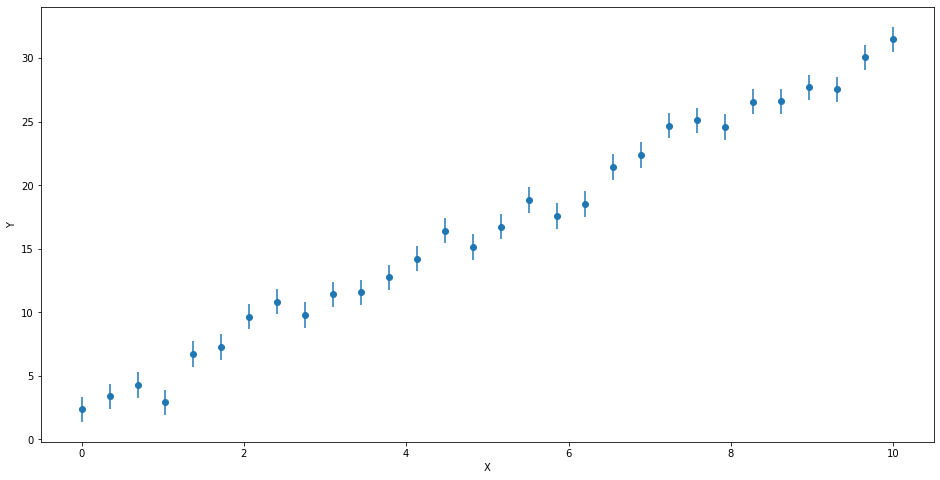

In [5]:
fig, ax = plt.subplots(figsize=(16, 8))

plt.errorbar(x, y, yerr = np.ones_like(y) * uncertainty_true, fmt = 'o')
ax.set_ylabel('Y');
ax.set_xlabel('X');

